In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df= pd.read_csv('scholarship.csv')
df.head(5)

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


## Z Score:
1. The Z-score measures how many standard deviations a data point is away from the mean. 
2. it quantifies the relative distance of a data point from the average. A high Z-score indicates that the data point is far from the mean, suggesting the possibility of an outlier.

## The Formula: 
>The formula to calculate the Z-score for a data point x is:

##  Z = ( X - µ )/σ
Where:

* x is observed value
* μ is the mean of the dataset.
* σ is the standard deviation of the dataset.

### Detecting Outliers with Z-Score:

1. Calculate the mean (μ) and standard deviation (σ) of the dataset.
2. For each data point (x) in the dataset, compute its Z-score.
3. Set a Z-score threshold (commonly 2 or 3) beyond which data points are considered outliers.
4. Identify data points with Z-scores greater than the threshold as potential outliers.

59.6
2700.0
6300.0


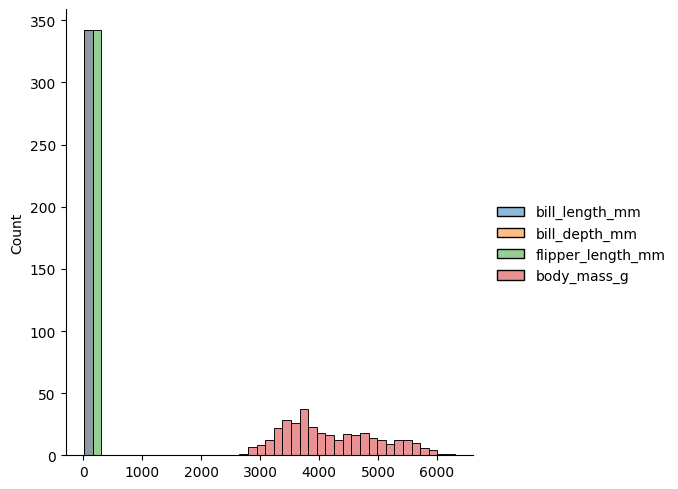

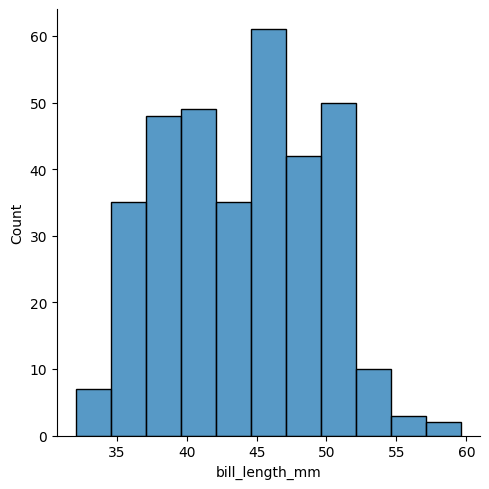

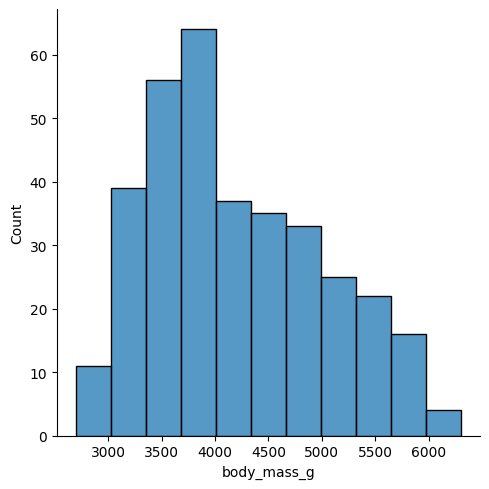

In [5]:
# displot
penguins = sns.load_dataset("penguins")
penguins.head()
print(penguins['bill_length_mm'].max())
print(penguins['body_mass_g'].min())
print(penguins['body_mass_g'].max())
sns.displot(penguins)
sns.displot(penguins ,x=penguins['bill_length_mm'])
sns.displot(penguins ,x=penguins['body_mass_g'])


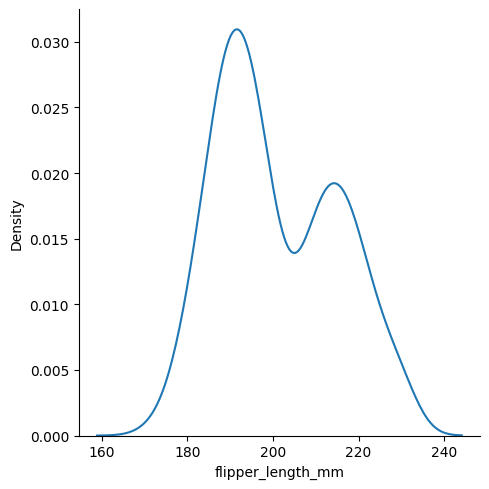

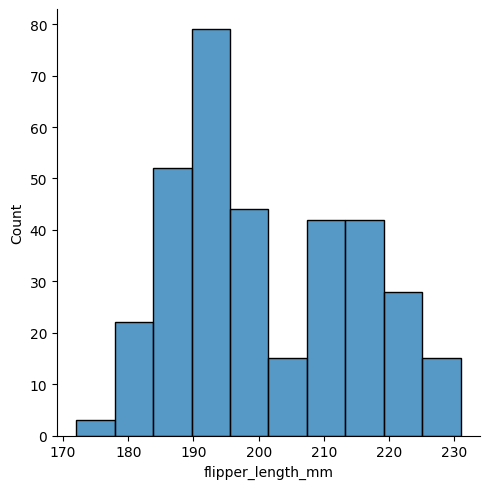

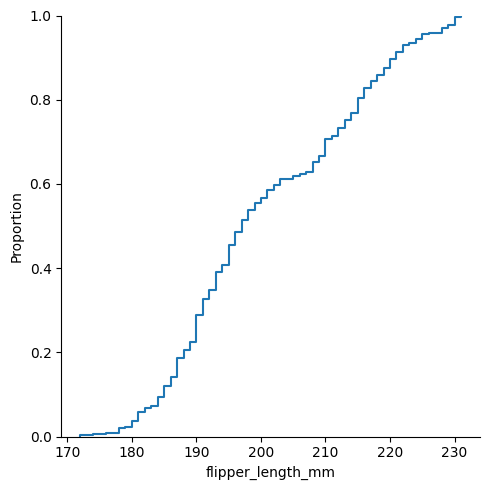

In [6]:
sns.displot(penguins, x= penguins['flipper_length_mm'],kind='kde')
sns.displot(penguins, x= penguins['flipper_length_mm'],kind='hist')
sns.displot(penguins, x= penguins['flipper_length_mm'],kind='ecdf')

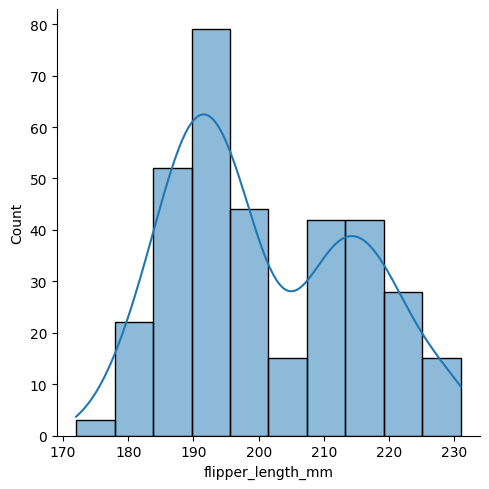

In [7]:
# sns.displot(penguins, x= penguins['flipper_length_mm'],kind='kde',hist = True)
sns.displot(penguins, x= penguins['flipper_length_mm'],kind='hist',kde= True)
# sns.displot(penguins, x= penguins['flipper_length_mm'],kind='ecdf',hist = True)

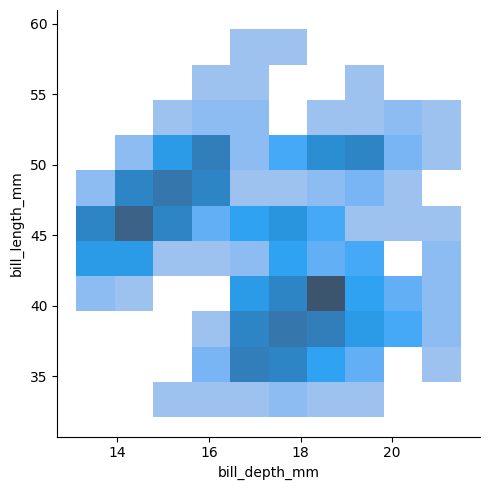

In [8]:
sns.displot(penguins , x= penguins['bill_depth_mm'],y=penguins['bill_length_mm'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


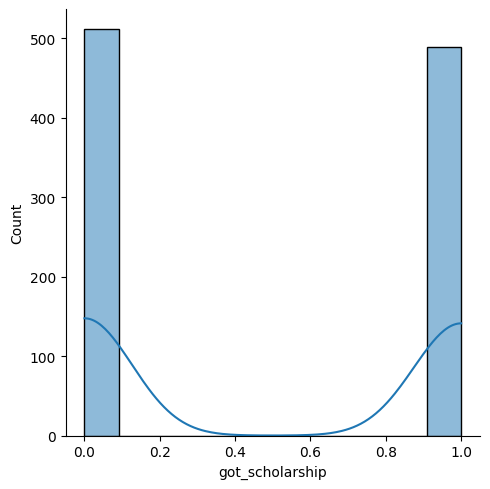

In [10]:
sns.displot(df['got_scholarship'],kde =True)

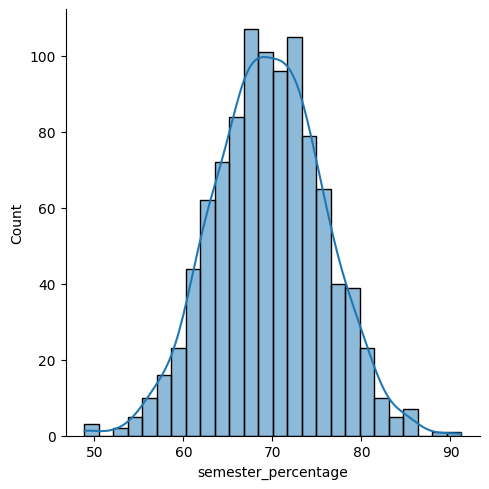

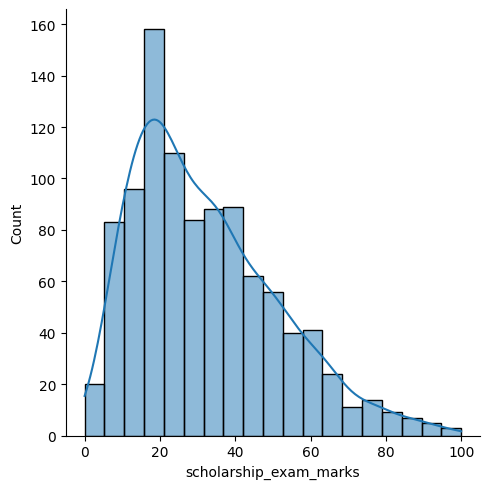

In [11]:
# plt.subplot(1,2,1)
sns.displot(df["semester_percentage"],kde=True)
# plt.subplot(1,2,2)
sns.displot(df["scholarship_exam_marks"],kde=True)
plt.show()

>__semester_percentage follow normal distribution so we will use z score to handel outliers__

<!--  -->

# 1Triming

In [12]:
# finding the min lim,it anjd max limit
mean=df['semester_percentage'].mean()
std = df['semester_percentage'].std()
print('Mean = ',mean)
print('Standard deviation = ',std)

Mean =  69.6124
Standard deviation =  6.158978751323897


In [13]:
# finding the values of higest allowed and lowest allowed
# since semester_percentage follow normal distribution so 
# lowest allowed = mean-3*std
# Highest allowed = mean+3*std

In [26]:
lowest_allowed= mean-2*std
higest_allowed=mean+2*std
print('Higest allowed value = ',higest_allowed)
print('Lowest allowed value = ',lowest_allowed)

Higest allowed value =  81.93035750264778
Lowest allowed value =  57.2944424973522


In [27]:
# let us check the min amd max value of the datset
print(df['semester_percentage'].min())
print(df['semester_percentage'].max())

48.9
91.2


* since the min and max value is beyond the max and min allow value so let us trim the data set

In [28]:
result = df[(df['semester_percentage']>=lowest_allowed) & (df['semester_percentage']<=higest_allowed)]

print(result.head(2))
print(result['semester_percentage'].min())
print(result['semester_percentage'].max())

   semester_percentage  scholarship_exam_marks  got_scholarship
0                 71.9                      26                1
1                 74.6                      38                1
57.3
81.9


<Axes: ylabel='semester_percentage'>

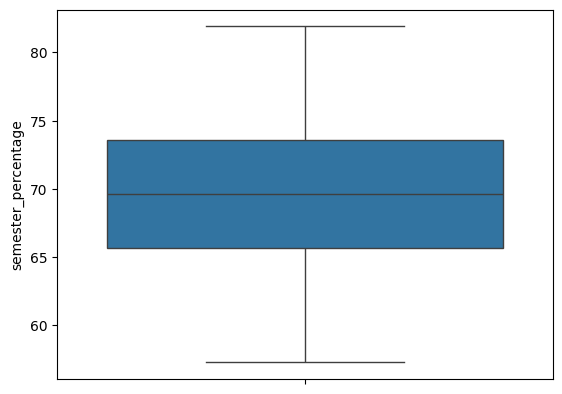

In [29]:
import seaborn as sns
sns.boxplot(result['semester_percentage'])

<font color = 'gold'>__Let us remove outlier using z scoe__</font>

In [30]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


<Axes: ylabel='semester_percentage'>

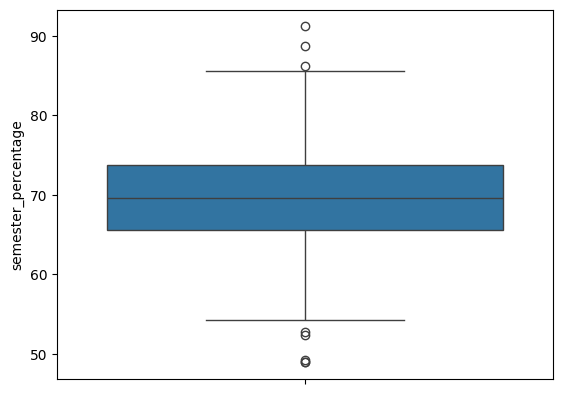

In [32]:
sns.boxplot(df['semester_percentage'])

In [61]:
df[(df['z_score']<3)&(df['z_score']>-3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


# Capping

In [63]:
print(lowest_allowed,',',higest_allowed)

51.13546374602831 , 88.08933625397168


In [65]:
df['semester_percentage']=np.where(df['semester_percentage']>higest_allowed,higest_allowed,
                                  np.where(df['semester_percentage']<lowest_allowed,lowest_allowed,df['semester_percentage']))

In [66]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239
